# Name Analysis & Visualization Research
## What's in a name? This project is set to explore, analyze and visualize the findings from the U.S. Social Security name database. 
Beyond a name’s cultural meaning or popularity ranking, there is much to uncover. This project will leverage the power of Python’s data analysis plugins to discover and present the findings. This notebook will walk you through several snippets of code that can be customized to allow for your curiosity to explore these questions with more relevance. 

**Important note:** Questions will build on eachother, so please be sure to "run" the code in order for everything to work as expected. 


**To get started, we'll load in our dataset.**
The dataset was merged using python scripts to merge individual files containing name data from 1880 - 2020. The new csv *name_stats.csv* includes: Name, Count, Gender, First (year on record), Last (year on record) and Total Years (on record). The data represents 358,480,709 children named at birth and registered with the social security office in the USA. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import the csv file
df_name_stats = pd.read_csv("ssn_files/name_stats.csv")
total_names_sum = df_name_stats["Count"].sum()

#display what the dataset returns and how many names are included
print(total_names_sum, "is the total number of names reflected in the social security name database.")
print(df_name_stats.head())

358480709 is the total number of names reflected in the social security name database.
      Name  Count Gender  First  Last  Peak
0    Aaban    120      M   2007  2019  2014
1    Aabha     46      F   2011  2020  2014
2    Aabid     16      M   2003  2018  2018
3  Aabidah      5      F   2018  2018  2018
4    Aabir     10      M   2016  2018  2016


Now that we know data is flowing in, we can run a query to show us name popularity.

## Question #1: What are the most popular male and female names from the US database?

<ipython-input-61-3c8d7aa6eee2>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_female = df[df_name_stats["Last"] == 2020]  #creates a view that only shows female list
<ipython-input-61-3c8d7aa6eee2>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_male = df[df_name_stats["Gender"] == "M"]  #creates a view that only shows male list


      Name    Count Gender  First  Last  Peak
0    James  5190161      M   1880  2020  1947
1     John  5142243      M   1880  2020  1947
2   Robert  4829631      M   1880  2020  1947
3  Michael  4383488      M   1880  2020  1957
4  William  4143886      M   1880  2020  1947
5     Mary  4130314      F   1880  2020  1921
6    David  3638877      M   1880  2020  1955
7   Joseph  2631147      M   1880  2020  1956
8  Richard  2569278      M   1880  2020  1946
9  Charles  2405574      M   1880  2020  1947
       Name    Count Gender  First  Last  Peak
0     James  5190161      M   1880  2020  1947
1      John  5142243      M   1880  2020  1947
2    Robert  4829631      M   1880  2020  1947
3   Michael  4383488      M   1880  2020  1957
4   William  4143886      M   1880  2020  1947
6     David  3638877      M   1880  2020  1955
7    Joseph  2631147      M   1880  2020  1956
8   Richard  2569278      M   1880  2020  1946
9   Charles  2405574      M   1880  2020  1947
10   Thomas  2325071    

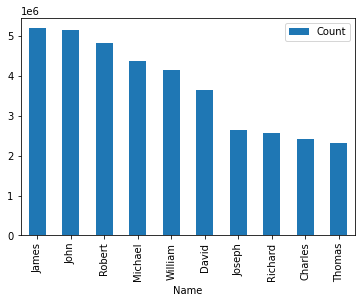

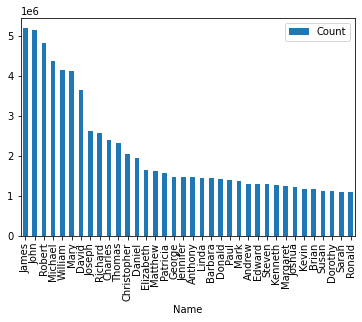

In [61]:
df_name_stats.sort_values(by="Count", inplace=True, ascending=False) # sort internally by Count, descending
df_name_stats.reset_index(drop=True, inplace=True) # re-index

df = df_name_stats.loc[0:100] # pull out top 100 (by Count)   

df_female = df[df_name_stats["Gender"] == "F"]  #creates a view that only shows female list  
df_male = df[df_name_stats["Gender"] == "M"]  #creates a view that only shows male list
print(df_female.head(10))
print(df_male.head(10))


#Creates the bar chart to show name and count for male
df_male = df_male.loc[0:10]
df_male.plot.bar(x="Name", y="Count", rot=90) # rotate labels
plt.show()

#Creates the bar chart to show name and count for female
df_female = df_female.loc[0:35] #used 35 because male and females are in the rows
df_female.plot.bar(x="Name", y="Count", rot=90) # rotate labels
plt.show(); #Adding a semicolon to suppress any other code warnings.

One interesting thing to note is that while some of these names are incredibly popular over time, they peaked in their popularity in the middle of the 20th century. 

To show how this might impact the all time popularity of a name, let's see how the name bank has grown.

# Question #2: How many unique names were recorded each year, and the total count of all the names that year. 

   Year  Name
0  1880  2000
1  1881  1934
2  1882  2127
3  1883  2084
4  1884  2297
   Year   Count
0  1880  201484
1  1881  192691
2  1882  221533
3  1883  216944
4  1884  243461


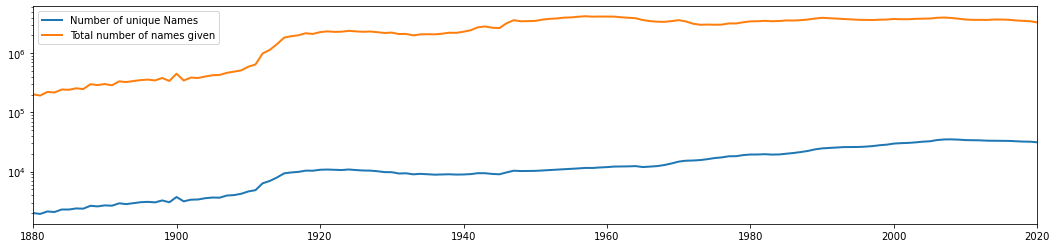

In [23]:
# Reminder of the columns in all_years.csv
# Name,Gender,Count,Year
# Mary,F,7065,1880

df_ay = pd.read_csv("ssn_files/all_years.csv")

plt.figure(figsize=(18, 4)) # set up aspect

#Making a new df to Group the number of names given in a year
df_ay2 = df_ay.groupby("Year", as_index=False)["Name"].count() 
print(df_ay2.head())

#Making a new df to Group the total count of names given by year 
df_ay3 = df_ay.groupby("Year", as_index=False)["Count"].sum()
print(df_ay3.head())

plt.plot( 'Year', 'Name', data=df_ay2, 
    linewidth=2,
    label="Number of unique Names ")

plt.plot( 'Year', 'Count', data=df_ay3, 
    linewidth=2,
    label="Total number of names given")

# show legend
plt.legend()
plt.xlim(1880, 2020) #

# it makes sense to show as a log because the values are so different
plt.yscale('log') 

# show graph
plt.show()

It's interesting to note that some names have become less popular over the years and have stopped being used all together. This prompts the next question. 
# Question #3: Which names have had a shorter longevity run than others?
It makes sense to sort this descending by count in order to see the names that do in fact have a high rates of use, but have since become unused.

In [4]:
df = df_name_stats.loc[0:50000] # limit the dataset for performance (by Count)   

# make a new Duration column
duration = df_name_stats["Last"] - df_name_stats["First"]
df.insert(5, "Duration", duration)

#A calculation must be done to remove names that are recent additions and still popular in 2020
not2020 = df[df["Last"] < 2020]
not2020.sort_values(by="Count", inplace=True, ascending=False) # sort internally by Count, descending
not2020.reset_index(drop=True, inplace=True) # reset the index so it stays at the current sort
print(not2020.head(50))

          Name   Count Gender  First  Last  Duration  Peak
0       Willie  146164      F   1880  2019       139  1919
1          Sue  144489      F   1880  2019       139  1947
2       Myrtle  136462      F   1880  2019       139  1918
3        Patty   62436      F   1880  2017       137  1959
4        Gayle   61330      F   1891  2019       128  1951
5        Patti   44704      F   1888  2018       130  1958
6         Teri   43918      F   1920  2019        99  1960
7      Laverne   42869      F   1885  2003       118  1924
8          Pat   40123      F   1897  1991        94  1941
9         Tami   37889      F   1942  2018        76  1959
10       Cheri   36042      F   1925  2019        94  1960
11     Carroll   35411      M   1880  2019       139  1934
12      Tammie   35368      F   1927  2017        90  1963
13     Deloris   34674      F   1899  2016       117  1947
14       Ronda   34308      F   1921  2017        96  1965
15         Pam   33126      F   1915  1996        81  19

<ipython-input-4-639272067e89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not2020.sort_values(by="Count", inplace=True, ascending=False) # sort internally by Count, descending


But let's be honest, you really just want to know about your own name. 
# Question #4: Input your name below in "single_name" to look it up.

            Name Gender  Count  Year
1209324  Graycen      F      6  1995
1237377  Graycen      F      5  1996
1259656  Graycen      F      8  1997
1288050  Graycen      F      7  1998
1313430  Graycen      F     10  1999
1338991  Graycen      F     18  2000
1367477  Graycen      F     25  2001
1400196  Graycen      F     15  2002
1430572  Graycen      F     16  2003
1451005  Graycen      M      7  2003
1462309  Graycen      F     15  2004
1492484  Graycen      F     22  2005
1518064  Graycen      M      5  2005
1524242  Graycen      F     29  2006
1548426  Graycen      M      8  2006
1558471  Graycen      F     29  2007
1580059  Graycen      M     14  2007
1593779  Graycen      F     27  2008
1617431  Graycen      M      9  2008
1628504  Graycen      F     29  2009
1649909  Graycen      M     14  2009
1662755  Graycen      F     32  2010
1681709  Graycen      M     29  2010
1696490  Graycen      F     35  2011
1717171  Graycen      M     17  2011
1729666  Graycen      F     47  2012
1

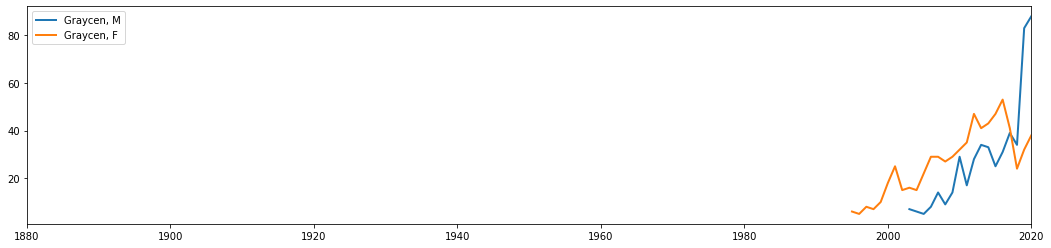

In [46]:
df = pd.read_csv("ssn_files/all_years.csv")  

#Replace the name here to graph it's popularity
single_name = "Graycen"

enter_name = [[single_name,"M"],[single_name,"F"]]

myname = df.query('Name == @enter_name[0]')
print(myname)

plt.figure(figsize=(18, 4)) # set up aspect


for nd in enter_name:
    name = nd[0]
    gender = nd[1]
    

    dfn = df.query('Name == @name and Gender==@gender')
    total = dfn["Count"].sum()
    
    print(f"{name} ({gender}): {total} total hits")

    plt.plot( 'Year', 'Count', data=dfn, 
            linewidth=2,
            label= name + ", " + gender)


# show legend
plt.legend()
plt.xlim(1880, 2020) #

#plt.yscale('log') #make sense for some presentations

# show graph
plt.show()

It's possible that a name appears to drop in utilization, while at the same time maintains a percentage of utilization.
# Question #5: Does the name follow a consistent rise and fall of utilization.

       Name    Count Gender  First  Last  Peak
0     James  5190161      M   1880  2020  1947
1629  James    23528      F   1880  2020  1928
James (M): 5190161 total hits
James (M): 5190161 total hits


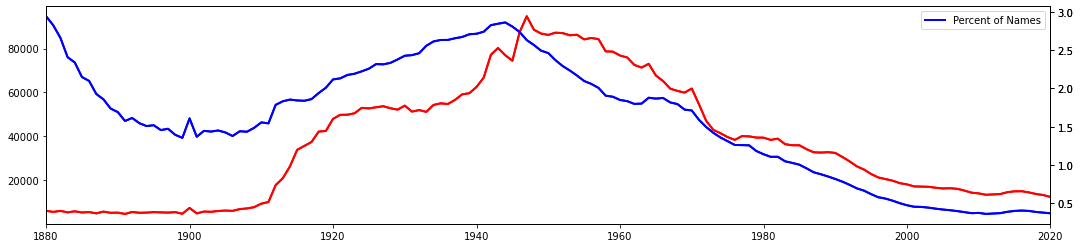

In [35]:
single_name = "James"

enter_name = [[single_name,"M"],[single_name,"M"]]

myname = df_name_stats.query('Name == @enter_name[0]')
print(myname)

df = pd.read_csv("ssn_files/all_years.csv") 

fig,ax = plt.subplots(figsize=(18, 4))
#ax.figure() # set up aspect


for nd in enter_name:
    name = nd[0]
    gender = nd[1]
    

    dfn = df.query('Name == @name and Gender==@gender')
    total = dfn["Count"].sum()
    df_ay3 = df_ay3.rename(columns={"Count":"Total Names Given"})
    #print(df_ay3.head())

    df_ay4 = df_ay3.join(dfn.set_index('Year'), on='Year')

    percent_name = (df_ay4["Count"] / df_ay4["Total Names Given"])*100 
    df_ay4.insert(5, "Percent", percent_name)
    #print(df_ay4.head())
    
    print(f"{name} ({gender}): {total} total hits")

    #ax = plt.subplots()
    ax.plot( 'Year', 'Count', data=df_ay4, 
            linewidth=2,
            color="red",
            label= name + ", " + gender)

    ax2=ax.twinx()

    ax2.plot( 'Year', 'Percent', data=df_ay4,
            linewidth=2,
            color="blue",
            label= "Percent of Names")

# show legend
plt.legend()
plt.xlim(1880, 2020) #

#plt.yscale('log') #make sense for some presentations

# show graph
plt.show()

It can also be fun to see how your name compares to others you know. Perhaps enter your family member's names or a group of friends. 

# Question #5: Enter a list of names to see them on the same graph. #

Phoebe (F): 35867 total hits
Chandler (M): 34501 total hits
Ross (M): 81198 total hits
Joey (M): 52427 total hits
Monica (F): 249273 total hits
Rachel (F): 567500 total hits


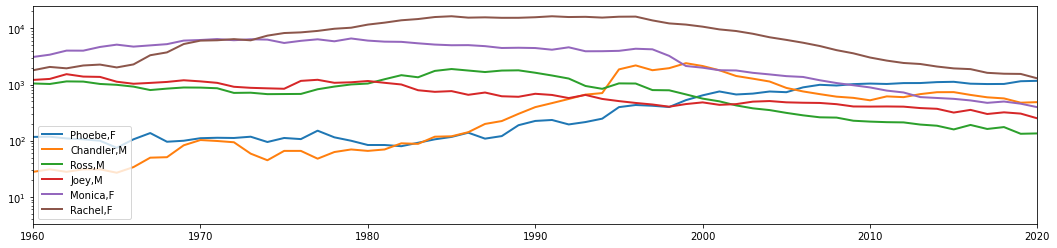

In [36]:
df = pd.read_csv("ssn_files/all_years.csv")
#print(df.head(10)) # To confirm the correct data is loading

plt.figure(figsize=(18, 4)) # set up aspect


# Name/gender as a list, many of these
name_lst = [["Phoebe","F"], 
            ["Chandler","M"],
            ["Ross","M"],
            ["Joey","M"],
            ["Monica","F"],
            ["Rachel","F"],          
        ]

for nd in name_lst:
    name = nd[0]
    gender = nd[1]
    

    dfn = df.query('Name == @name and Gender==@gender')
    total = dfn["Count"].sum()

    print(f"{name} ({gender}): {total} total hits")

    plt.plot( 'Year', 'Count', data=dfn, 
            linewidth=2,
            label=name+","+gender)

# show legend
plt.legend(loc ="lower left")
plt.xlim(1960, 2020) #

plt.yscale('log') # log scale makes more sense to me ...

# show graph
plt.show()

---
## Other applications ##
This same visualization can be used to understand the influence of historical figure's can have on parents as they name their children. For example, for less common names, the changes are more apparent.
![alt text](img/images/Slide1.jpg)
![alt text](img/images/Slide2.jpg)

